# Evaluation notebook
This notebook is meant to be executed after 'main.py' and 'main_multiuser.py', since it uses the results stored by those programs for visualisation purposes.
The first cell contains the parameters to be tuned for a correct execution. Here's a quick explanation:
- datapath: string, containing the folder where results have been stored by 'main.py' and 'main_multiuser.py'. Note that results are saved as .txt files;
- subjects: list of integers, containing the different configurations of subjects on which models have been tested;
- model_names: list of strings, containing the names of models that have been deployed.

In [1]:
datapath = "./data/results/"
subjects = [1,2,3,4,23]
model_names = ["Convolutional", "Convolutional1DRecurrent", "Convolutional2DRecurrent", "ConvolutionalDeepRecurrent"]

Import useful packeges.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Task A

In [3]:
task = "A"
results = np.zeros([4,len(subjects),len(model_names)])
print("Results matrix has shape", results.shape)
for model in enumerate(model_names):
    for s in enumerate(subjects):
        filename = task + "_" + model[1] + "_" + str(s[1]) + ".txt"
        print("Loading", filename)
        results[:,s[0], model[0]] = np.loadtxt(datapath + filename, comments="#", delimiter="\n", unpack=False)

Results matrix has shape (4, 5, 4)
Loading A_Convolutional_1.txt
Loading A_Convolutional_2.txt
Loading A_Convolutional_3.txt
Loading A_Convolutional_4.txt
Loading A_Convolutional_23.txt
Loading A_Convolutional1DRecurrent_1.txt
Loading A_Convolutional1DRecurrent_2.txt
Loading A_Convolutional1DRecurrent_3.txt
Loading A_Convolutional1DRecurrent_4.txt
Loading A_Convolutional1DRecurrent_23.txt
Loading A_Convolutional2DRecurrent_1.txt
Loading A_Convolutional2DRecurrent_2.txt
Loading A_Convolutional2DRecurrent_3.txt
Loading A_Convolutional2DRecurrent_4.txt
Loading A_Convolutional2DRecurrent_23.txt
Loading A_ConvolutionalDeepRecurrent_1.txt
Loading A_ConvolutionalDeepRecurrent_2.txt
Loading A_ConvolutionalDeepRecurrent_3.txt
Loading A_ConvolutionalDeepRecurrent_4.txt
Loading A_ConvolutionalDeepRecurrent_23.txt


## One-Shot classification results
These results consist of the classifications performed with the null class, which are stored on the top matrix.

In [4]:
res_A1 = pd.DataFrame(results[0,:,:], index=["S1", "S2", "S3", "S4", "S2+S3"], columns=model_names)
res_A1

,Convolutional,Convolutional1DRecurrent,Convolutional2DRecurrent,ConvolutionalDeepRecurrent
S1,0.8953,0.9040,0.9100,0.8996
S2,0.7543,0.7575,0.7688,0.7625
S3,0.8415,0.8056,0.8286,0.8157
S4,0.8441,0.8735,0.8733,0.8558
S2+S3,0.8053,0.7913,0.7955,0.7912


<Figure size 432x288 with 0 Axes>

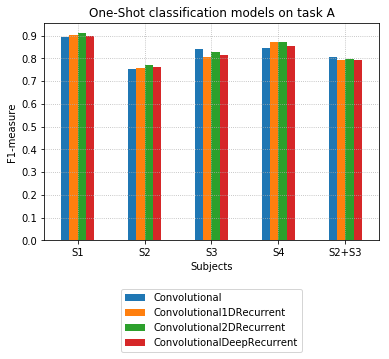

In [5]:
plt.figure()
res_A1.plot(kind='bar', layout="t", logy=False);
lgd = plt.legend(loc=9, bbox_to_anchor=(0.5, -0.2))
plt.title("One-Shot classification models on task A")
plt.ylabel("F1-measure")
plt.yticks(np.arange(0,1, 0.1))
plt.xlabel("Subjects")
plt.xticks(rotation="horizontal")
plt.grid(linestyle="dotted")
plt.tight_layout
plt.savefig(datapath+"A_models_nullclass.eps", dpi=600, bbox_extra_artists=(lgd,), bbox_inches='tight')

## Two-Steps - classification results
These results consist of the classifications performed without the null class, which are stored on the bottom matrix.

In [6]:
res_A2 = pd.DataFrame(results[2,:,:], index=["S1", "S2", "S3", "S4", "S2+S3"], columns=model_names)
res_A2

,Convolutional,Convolutional1DRecurrent,Convolutional2DRecurrent,ConvolutionalDeepRecurrent
S1,0.9404,0.9366,0.9390,0.9416
S2,0.8803,0.7885,0.7817,0.7839
S3,0.8939,0.8845,0.8855,0.8910
S4,0.8880,0.8924,0.8932,0.8840
S2+S3,0.8371,0.8351,0.8338,0.8402


<Figure size 432x288 with 0 Axes>

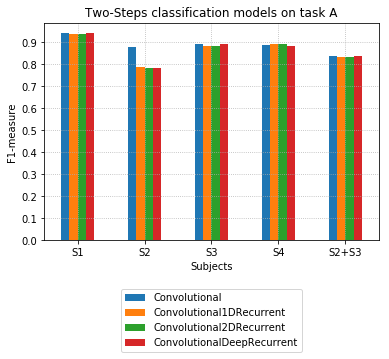

In [7]:
plt.figure()
res_A2.plot(kind='bar', layout="t", logy=False);
lgd = plt.legend(loc=9, bbox_to_anchor=(0.5, -0.2))
plt.title("Two-Steps classification models on task A")
plt.ylabel("F1-measure")
plt.yticks(np.arange(0,1, 0.1))
plt.xlabel("Subjects")
plt.xticks(rotation="horizontal")
plt.grid(linestyle="dotted")
plt.tight_layout
plt.savefig(datapath+"A_models_nonullclass.eps", dpi=600, bbox_extra_artists=(lgd,), bbox_inches='tight')

## Cascade classification results

In [8]:
res_A_TS = pd.DataFrame(results[3,:,:], index=["S1", "S2", "S3", "S4", "S2+S3"], columns=model_names)
res_A_TS

,Convolutional,Convolutional1DRecurrent,Convolutional2DRecurrent,ConvolutionalDeepRecurrent
S1,0.9115,0.9097,0.9046,0.9069
S2,0.8385,0.7716,0.7707,0.7655
S3,0.8453,0.8055,0.8304,0.8327
S4,0.8642,0.8774,0.8789,0.8706
S2+S3,0.7773,0.7815,0.7968,0.7878


<Figure size 432x288 with 0 Axes>

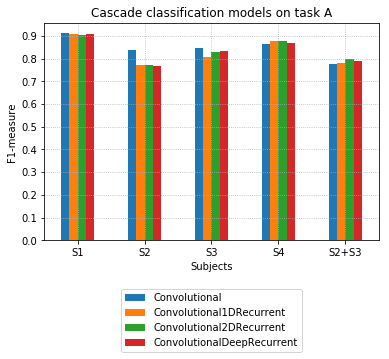

In [9]:
plt.figure()
res_A_TS.plot(kind='bar', layout="t", logy=False);
lgd = plt.legend(loc=9, bbox_to_anchor=(0.5, -0.2))
plt.title("Cascade classification models on task A")
plt.ylabel("F1-measure")
plt.yticks(np.arange(0,1, 0.1))
plt.xlabel("Subjects")
plt.xticks(rotation="horizontal")
plt.grid(linestyle="dotted")
plt.tight_layout
plt.savefig(datapath+"A_models_cascade.eps", dpi=600, bbox_extra_artists=(lgd,), bbox_inches='tight')

## Comparison between classifications with and without null class

In [10]:
res_A_comp = pd.concat([res_A1, res_A2], axis=1, keys=["with null class", "without null class"])
res_A_comp

with null class                                                    \
        Convolutional Convolutional1DRecurrent Convolutional2DRecurrent   
S1             0.8953                   0.9040                   0.9100   
S2             0.7543                   0.7575                   0.7688   
S3             0.8415                   0.8056                   0.8286   
S4             0.8441                   0.8735                   0.8733   
S2+S3          0.8053                   0.7913                   0.7955   

                                 without null class                           \
      ConvolutionalDeepRecurrent      Convolutional Convolutional1DRecurrent   
S1                        0.8996             0.9404                   0.9366   
S2                        0.7625             0.8803                   0.7885   
S3                        0.8157             0.8939                   0.8845   
S4                        0.8558             0.8880                   0.8924   
S2+S3                     0.7912             0.8371                   0.8351   

                                                           
      Convolutional2DRecurrent ConvolutionalDeepRecurrent  
S1                      0.9390                     0.9416  
S2                      0.7817                     0.7839  
S3                      0.8855                     0.8910  
S4                      0.8932                     0.8840  
S2+S3                   0.8338                     0.8402

<Figure size 432x288 with 0 Axes>

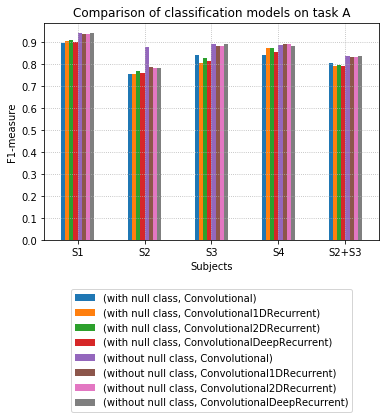

In [11]:
plt.figure()
res_A_comp.plot(kind='bar', layout="t", logy=False);
lgd = plt.legend(loc=9, bbox_to_anchor=(0.5, -0.2))
plt.title("Comparison of classification models on task A")
plt.ylabel("F1-measure")
plt.yticks(np.arange(0,1, 0.1))
plt.xlabel("Subjects")
plt.xticks(rotation="horizontal")
plt.grid(linestyle="dotted")
plt.tight_layout
plt.savefig(datapath+"A_models_comparison.eps", dpi=600, bbox_extra_artists=(lgd,), bbox_inches='tight')

## Comparison between One Shot and Two Steps (Cascade) classification

In [12]:
res_A_comp2 = pd.concat([res_A1, res_A_TS], axis=1, keys=["One Shot", "Two Steps"])
res_A_comp2

One Shot                                                    \
      Convolutional Convolutional1DRecurrent Convolutional2DRecurrent   
S1           0.8953                   0.9040                   0.9100   
S2           0.7543                   0.7575                   0.7688   
S3           0.8415                   0.8056                   0.8286   
S4           0.8441                   0.8735                   0.8733   
S2+S3        0.8053                   0.7913                   0.7955   

                                     Two Steps                           \
      ConvolutionalDeepRecurrent Convolutional Convolutional1DRecurrent   
S1                        0.8996        0.9115                   0.9097   
S2                        0.7625        0.8385                   0.7716   
S3                        0.8157        0.8453                   0.8055   
S4                        0.8558        0.8642                   0.8774   
S2+S3                     0.7912        0.7773                   0.7815   

                                                           
      Convolutional2DRecurrent ConvolutionalDeepRecurrent  
S1                      0.9046                     0.9069  
S2                      0.7707                     0.7655  
S3                      0.8304                     0.8327  
S4                      0.8789                     0.8706  
S2+S3                   0.7968                     0.7878

<Figure size 432x288 with 0 Axes>

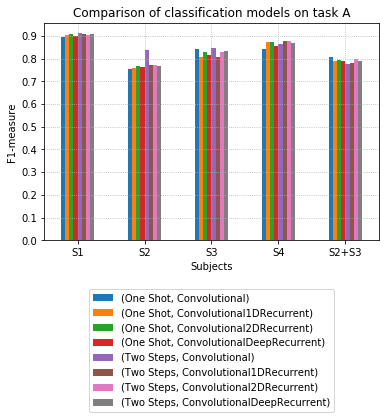

In [13]:
plt.figure()
res_A_comp2.plot(kind='bar', layout="t", logy=False);
lgd = plt.legend(loc=9, bbox_to_anchor=(0.5, -0.2))
plt.title("Comparison of classification models on task A")
plt.ylabel("F1-measure")
plt.yticks(np.arange(0,1, 0.1))
plt.xlabel("Subjects")
plt.xticks(rotation="horizontal")
plt.grid(linestyle="dotted")
plt.tight_layout
plt.savefig(datapath+"A_pipeline_comparison.eps", dpi=600, bbox_extra_artists=(lgd,), bbox_inches='tight')

## Results by model
Select one model to display its 3 results on each run. The available models are the following:
- 0: Convolutional
- 1: Convolutional1DRecurrent
- 2: COnvolutional2DRecurrent
- 3: ConvolutionalDeepRecurrend

In [14]:
select_model = 1
print("Displaying results for", model_names[select_model], "model.")

Displaying results for Convolutional1DRecurrent model.


In [15]:
res_A3 = pd.DataFrame(results[:,:,select_model].T,
                      index=["S1", "S2", "S3", "S4", "S2+S3"],
                      columns=["One-Shot Classification", "Two-Step Detection", "Two-Step Classification", "Cascade Classification"])
res_A3

,One-Shot Classification,Two-Step Detection,Two-Step Classification,Cascade Classification
S1,0.9040,0.9565,0.9366,0.9097
S2,0.7575,0.9463,0.7885,0.7716
S3,0.8056,0.9155,0.8845,0.8055
S4,0.8735,0.9715,0.8924,0.8774
S2+S3,0.7913,0.9324,0.8351,0.7815


<Figure size 432x288 with 0 Axes>

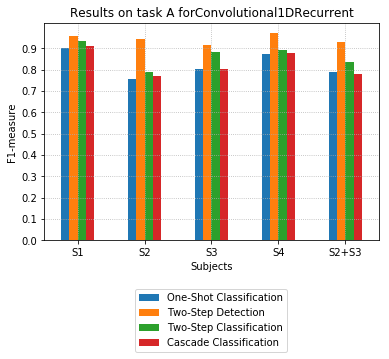

In [16]:
plt.figure()
res_A3.plot(kind='bar', layout="t", logy=False);
lgd = plt.legend(loc=9, bbox_to_anchor=(0.5, -0.2))
plt.title("Results on task A for"+model_names[select_model])
plt.ylabel("F1-measure")
plt.yticks(np.arange(0,1, 0.1))
plt.xlabel("Subjects")
plt.xticks(rotation="horizontal")
plt.grid(linestyle="dotted")
plt.tight_layout
plt.savefig(datapath+"A_"+model_names[select_model]+".eps", dpi=600, bbox_extra_artists=(lgd,), bbox_inches='tight')

# Task B

In [17]:
task = "B"
results = np.zeros([4,len(subjects),len(model_names)])
print("Results matrix has shape", results.shape)
for model in enumerate(model_names):
    for s in enumerate(subjects):
        filename = task + "_" + model[1] + "_" + str(s[1]) + ".txt"
        print("Loading", filename)
        results[:,s[0], model[0]] = np.loadtxt(datapath + filename, comments="#", delimiter="\n", unpack=False)

Results matrix has shape (4, 5, 4)
Loading B_Convolutional_1.txt
Loading B_Convolutional_2.txt
Loading B_Convolutional_3.txt
Loading B_Convolutional_4.txt
Loading B_Convolutional_23.txt
Loading B_Convolutional1DRecurrent_1.txt
Loading B_Convolutional1DRecurrent_2.txt
Loading B_Convolutional1DRecurrent_3.txt
Loading B_Convolutional1DRecurrent_4.txt
Loading B_Convolutional1DRecurrent_23.txt
Loading B_Convolutional2DRecurrent_1.txt
Loading B_Convolutional2DRecurrent_2.txt
Loading B_Convolutional2DRecurrent_3.txt
Loading B_Convolutional2DRecurrent_4.txt
Loading B_Convolutional2DRecurrent_23.txt
Loading B_ConvolutionalDeepRecurrent_1.txt
Loading B_ConvolutionalDeepRecurrent_2.txt
Loading B_ConvolutionalDeepRecurrent_3.txt
Loading B_ConvolutionalDeepRecurrent_4.txt
Loading B_ConvolutionalDeepRecurrent_23.txt


## One-Shot classification results
These results consist of the classifications performed with the null class, which are stored on the top matrix.

In [18]:
res_B1 = pd.DataFrame(results[0,:,:], index=["S1", "S2", "S3", "S4", "S2+S3"], columns=model_names)
res_B1

,Convolutional,Convolutional1DRecurrent,Convolutional2DRecurrent,ConvolutionalDeepRecurrent
S1,0.8803,0.8986,0.8870,0.8778
S2,0.8013,0.8030,0.8015,0.8005
S3,0.8567,0.8726,0.8785,0.8543
S4,0.8388,0.8425,0.8504,0.8334
S2+S3,0.8316,0.8335,0.8417,0.8137


<Figure size 432x288 with 0 Axes>

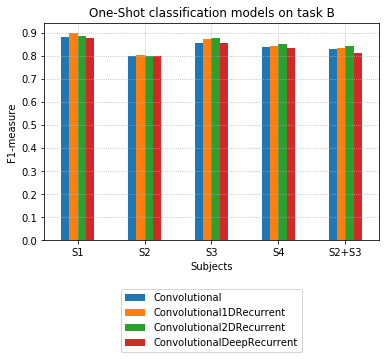

In [19]:
plt.figure()
res_B1.plot(kind='bar', layout="t", logy=False);
lgd = plt.legend(loc=9, bbox_to_anchor=(0.5, -0.2))
plt.title("One-Shot classification models on task B")
plt.ylabel("F1-measure")
plt.yticks(np.arange(0,1, 0.1))
plt.xlabel("Subjects")
plt.xticks(rotation="horizontal")
plt.grid(linestyle="dotted")
plt.tight_layout
plt.savefig(datapath+"B_models_nullclass.eps", dpi=600, bbox_extra_artists=(lgd,), bbox_inches='tight')

## Two-Step classification results
These results consist of the classifications performed without the null class, which are stored on the bottom matrix.

In [20]:
res_B2 = pd.DataFrame(results[2,:,:], index=["S1", "S2", "S3", "S4", "S2+S3"], columns=model_names)
res_B2

,Convolutional,Convolutional1DRecurrent,Convolutional2DRecurrent,ConvolutionalDeepRecurrent
S1,0.7652,0.7982,0.8164,0.7846
S2,0.3581,0.3452,0.4248,0.3342
S3,0.7401,0.7703,0.8398,0.7370
S4,0.6334,0.6930,0.6846,0.6434
S2+S3,0.5632,0.6015,0.6371,0.5626


<Figure size 432x288 with 0 Axes>

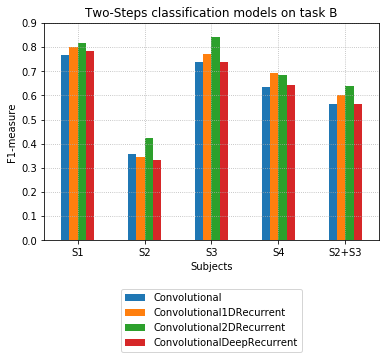

In [21]:
plt.figure()
res_B2.plot(kind='bar', layout="t", logy=False);
lgd = plt.legend(loc=9, bbox_to_anchor=(0.5, -0.2))
plt.title("Two-Steps classification models on task B")
plt.ylabel("F1-measure")
plt.yticks(np.arange(0,1, 0.1))
plt.xlabel("Subjects")
plt.xticks(rotation="horizontal")
plt.grid(linestyle="dotted")
plt.tight_layout
plt.savefig(datapath+"B_models_nonullclass.eps", dpi=600, bbox_extra_artists=(lgd,), bbox_inches='tight')

## Cascade classification results

In [22]:
res_B_TS = pd.DataFrame(results[3,:,:], index=["S1", "S2", "S3", "S4", "S2+S3"], columns=model_names)
res_B_TS

,Convolutional,Convolutional1DRecurrent,Convolutional2DRecurrent,ConvolutionalDeepRecurrent
S1,0.8837,0.8794,0.8840,0.8814
S2,0.7987,0.7937,0.8009,0.7945
S3,0.8583,0.8602,0.8720,0.8474
S4,0.8223,0.8220,0.8379,0.8303
S2+S3,0.8178,0.8045,0.8248,0.8200


<Figure size 432x288 with 0 Axes>

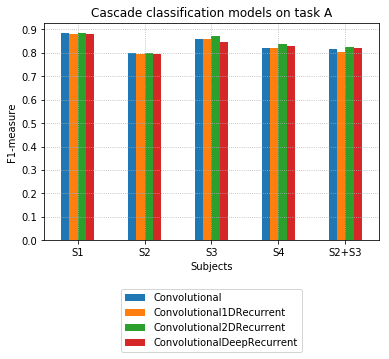

In [23]:
plt.figure()
res_B_TS.plot(kind='bar', layout="t", logy=False);
lgd = plt.legend(loc=9, bbox_to_anchor=(0.5, -0.2))
plt.title("Cascade classification models on task A")
plt.ylabel("F1-measure")
plt.yticks(np.arange(0,1, 0.1))
plt.xlabel("Subjects")
plt.xticks(rotation="horizontal")
plt.grid(linestyle="dotted")
plt.tight_layout
plt.savefig(datapath+"A_models_cascade.eps", dpi=600, bbox_extra_artists=(lgd,), bbox_inches='tight')

## Comparison between classifications with and without null class

In [24]:
res_B_comp = pd.concat([res_B1, res_B2], axis=1, keys=["with null class", "without null class"])
res_B_comp

with null class                                                    \
        Convolutional Convolutional1DRecurrent Convolutional2DRecurrent   
S1             0.8803                   0.8986                   0.8870   
S2             0.8013                   0.8030                   0.8015   
S3             0.8567                   0.8726                   0.8785   
S4             0.8388                   0.8425                   0.8504   
S2+S3          0.8316                   0.8335                   0.8417   

                                 without null class                           \
      ConvolutionalDeepRecurrent      Convolutional Convolutional1DRecurrent   
S1                        0.8778             0.7652                   0.7982   
S2                        0.8005             0.3581                   0.3452   
S3                        0.8543             0.7401                   0.7703   
S4                        0.8334             0.6334                   0.6930   
S2+S3                     0.8137             0.5632                   0.6015   

                                                           
      Convolutional2DRecurrent ConvolutionalDeepRecurrent  
S1                      0.8164                     0.7846  
S2                      0.4248                     0.3342  
S3                      0.8398                     0.7370  
S4                      0.6846                     0.6434  
S2+S3                   0.6371                     0.5626

<Figure size 432x288 with 0 Axes>

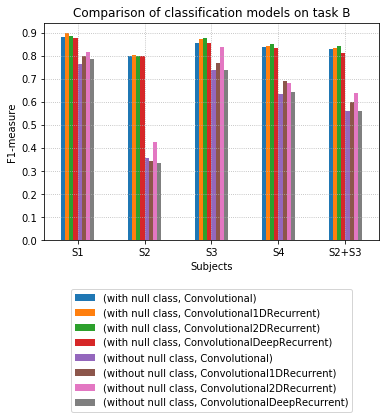

In [25]:
plt.figure()
res_B_comp.plot(kind='bar', layout="t", logy=False);
lgd = plt.legend(loc=9, bbox_to_anchor=(0.5, -0.2))
plt.title("Comparison of classification models on task B")
plt.ylabel("F1-measure")
plt.yticks(np.arange(0,1, 0.1))
plt.xlabel("Subjects")
plt.xticks(rotation="horizontal")
plt.grid(linestyle="dotted")
plt.tight_layout
plt.savefig(datapath+"B_models_comparison.eps", dpi=600, bbox_extra_artists=(lgd,), bbox_inches='tight')

## Comparison between One Shot and Two Steps (Cascade) classification

In [26]:
res_A_comp2 = pd.concat([res_A1, res_A_TS], axis=1, keys=["One Shot", "Two Steps"])
res_A_comp2

One Shot                                                    \
      Convolutional Convolutional1DRecurrent Convolutional2DRecurrent   
S1           0.8953                   0.9040                   0.9100   
S2           0.7543                   0.7575                   0.7688   
S3           0.8415                   0.8056                   0.8286   
S4           0.8441                   0.8735                   0.8733   
S2+S3        0.8053                   0.7913                   0.7955   

                                     Two Steps                           \
      ConvolutionalDeepRecurrent Convolutional Convolutional1DRecurrent   
S1                        0.8996        0.9115                   0.9097   
S2                        0.7625        0.8385                   0.7716   
S3                        0.8157        0.8453                   0.8055   
S4                        0.8558        0.8642                   0.8774   
S2+S3                     0.7912        0.7773                   0.7815   

                                                           
      Convolutional2DRecurrent ConvolutionalDeepRecurrent  
S1                      0.9046                     0.9069  
S2                      0.7707                     0.7655  
S3                      0.8304                     0.8327  
S4                      0.8789                     0.8706  
S2+S3                   0.7968                     0.7878

<Figure size 432x288 with 0 Axes>

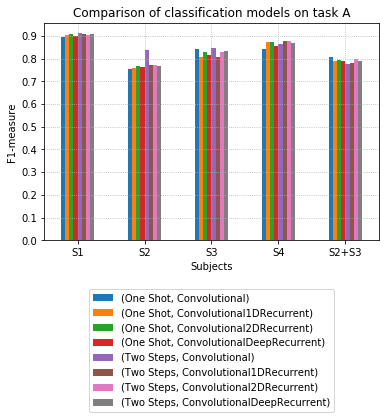

In [27]:
plt.figure()
res_A_comp2.plot(kind='bar', layout="t", logy=False);
lgd = plt.legend(loc=9, bbox_to_anchor=(0.5, -0.2))
plt.title("Comparison of classification models on task A")
plt.ylabel("F1-measure")
plt.yticks(np.arange(0,1, 0.1))
plt.xlabel("Subjects")
plt.xticks(rotation="horizontal")
plt.grid(linestyle="dotted")
plt.tight_layout
plt.savefig(datapath+"A_pipeline_comparison.eps", dpi=600, bbox_extra_artists=(lgd,), bbox_inches='tight')

## Results by model
Select one model to display its 3 results on each run. The available models are the following:
- 0: Convolutional
- 1: Convolutional1DRecurrent
- 2: COnvolutional2DRecurrent
- 3: ConvolutionalDeepRecurrend

In [28]:
select_model = 3
print("Displaying results for", model_names[select_model], "model.")

Displaying results for ConvolutionalDeepRecurrent model.


In [30]:
res_B3 = pd.DataFrame(results[:,:,select_model].T,
                      index=["S1", "S2", "S3", "S4", "S2+S3"],
                      columns=["One-Shot Classification", "Two-Step Detection", "Two-Step Classification", "Cascade Classification"])
res_B3

,One-Shot Classification,Two-Step Detection,Two-Step Classification,Cascade Classification
S1,0.8778,0.9209,0.7846,0.8814
S2,0.8005,0.8600,0.3342,0.7945
S3,0.8543,0.8919,0.7370,0.8474
S4,0.8334,0.8863,0.6434,0.8303
S2+S3,0.8137,0.8697,0.5626,0.8200


<Figure size 432x288 with 0 Axes>

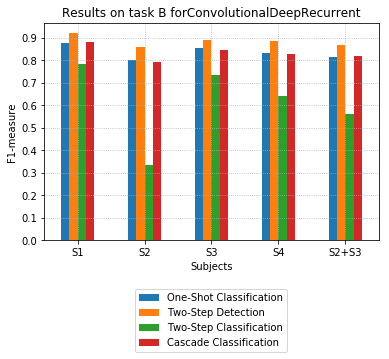

In [31]:
plt.figure()
res_B3.plot(kind='bar', layout="t", logy=False);
lgd = plt.legend(loc=9, bbox_to_anchor=(0.5, -0.2))
plt.title("Results on task B for"+model_names[select_model])
plt.ylabel("F1-measure")
plt.yticks(np.arange(0,1, 0.1))
plt.xlabel("Subjects")
plt.xticks(rotation="horizontal")
plt.grid(linestyle="dotted")
plt.tight_layout
plt.savefig(datapath+"B_"+model_names[select_model]+".eps", dpi=600, bbox_extra_artists=(lgd,), bbox_inches='tight')

# End